In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용 - 리눅스 사용할때
import scipy
import scipy.stats as stats

import os
import re
import time
import datetime as dt # 사용시 datetime.dt 로 사용 # 현재 시간 사용
from datetime import datetime # 사용시 함수로 바로 사용 #-> 시간 비교
### 한글 폰트 설치 - 윈도우 사용할 때
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

path = 'c:/Windows/Fonts/malgun.ttf'  # 또는 나눔고딕: 'c:/Windows/Fonts/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
# seaborn에 내장되어 있는 샘플데이터 iris - 붓꽃에 대한 데이터
df_iris = sns.load_dataset("iris")
df_iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df_iris.shape

(150, 5)

In [4]:
df_iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Scatterplot

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

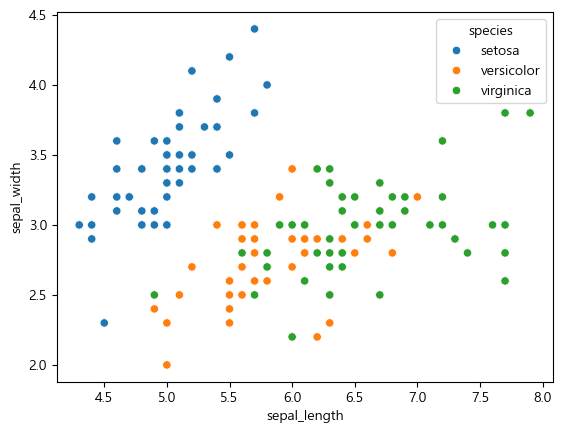

In [5]:
# scatterplot (산점도) : 분포 정도 확인
sns.scatterplot(x='sepal_length', y='sepal_width', data=df_iris, hue='species') # hue : 값을 범주로 분류하는 파라미터

### Boxplot

<Axes: xlabel='species', ylabel='petal_length'>

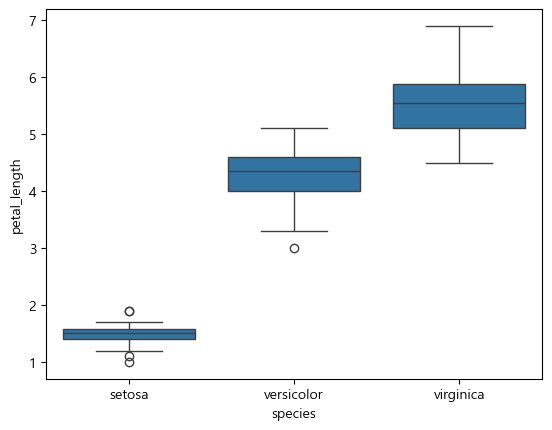

In [6]:
# 박스플롯 - 이상치 확인에 유용
sns.boxplot(x="species", y="petal_length", data=df_iris)

### Countplot

<Axes: xlabel='species', ylabel='count'>

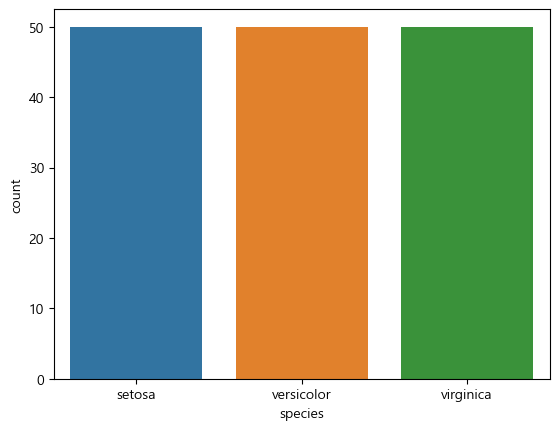

In [7]:
# 카운트플롯 - 카테고리별 갯수 파악에 유용
sns.countplot(x="species", data=df_iris, hue = "species")

### Barplot

<Axes: xlabel='species', ylabel='count'>

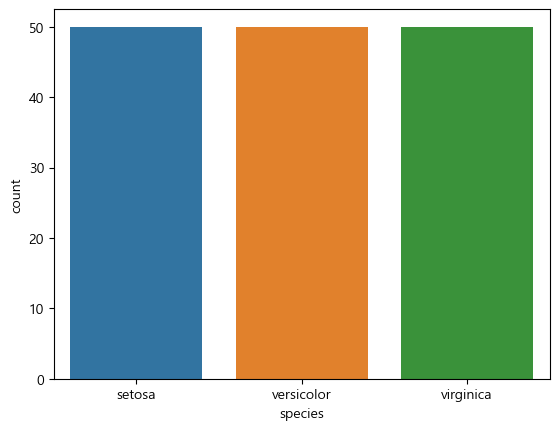

In [8]:
# 바플롯 - countplot이랑 비슷함
species_counts = df_iris['species'].value_counts().reset_index()
sns.barplot(x='species', y='count', data=species_counts, hue = "species")

### Pie

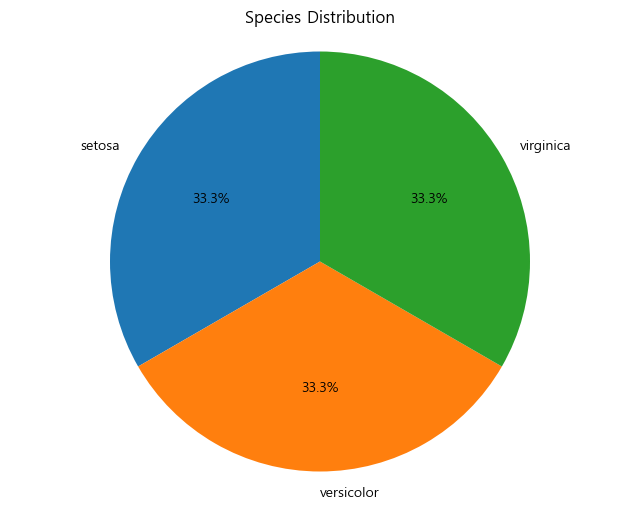

In [9]:
# 파이플롯 - 비율을 효과적으로 파악

# species별 갯수 계산
species_counts = df_iris['species'].value_counts()

# 파이플롯으로 species별 갯수 시각화
plt.figure(figsize=(8, 6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Species Distribution')
plt.axis('equal')  # 원형으로 표시
plt.show()

### Histogram

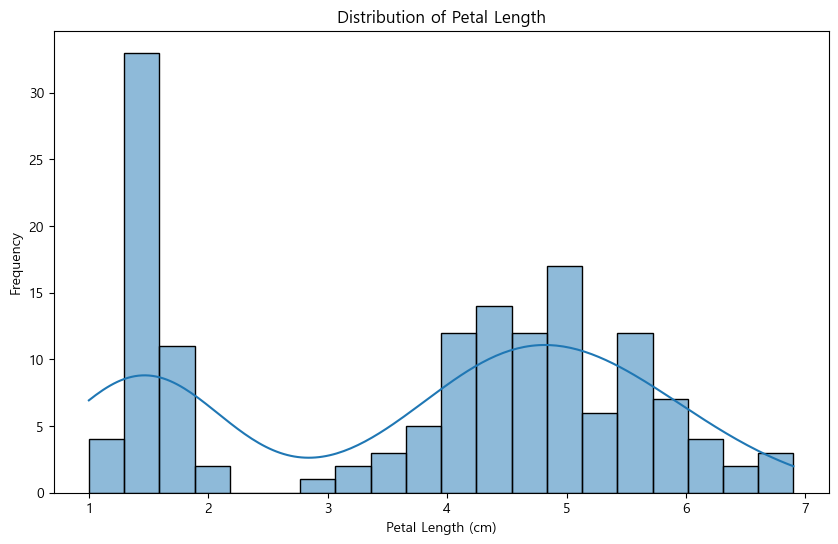

In [10]:
# 히스토그램 그리기
plt.figure(figsize=(10, 6))
sns.histplot(df_iris['petal_length'], bins=20, kde=True)  # kde=True로 밀도 곡선 추가
plt.title('Distribution of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.show()

### Lineplot

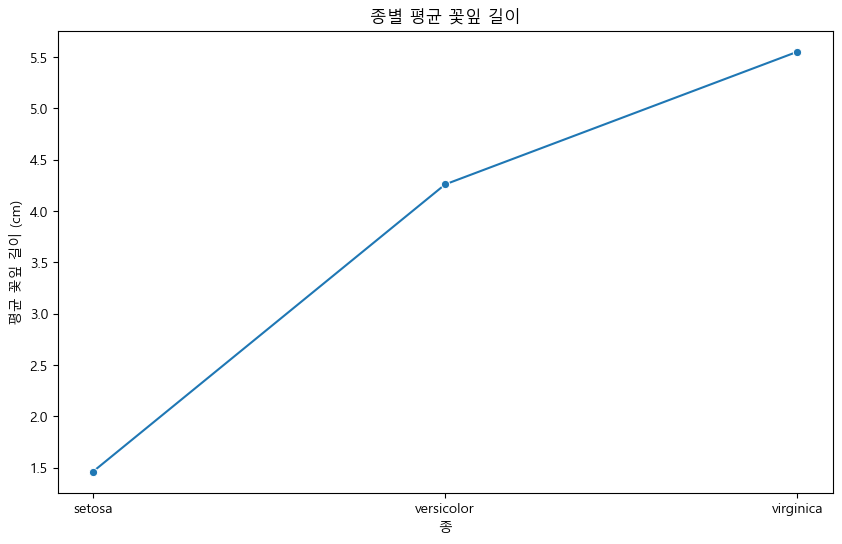

In [11]:
# 라인플롯 
mean_petal_length = df_iris.groupby('species')['petal_length'].mean().reset_index()

# 라인플롯 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(x='species', y='petal_length', data=mean_petal_length, marker='o')
plt.title('종별 평균 꽃잎 길이')
plt.xlabel('종')
plt.ylabel('평균 꽃잎 길이 (cm)')
plt.show()

### Heatmap

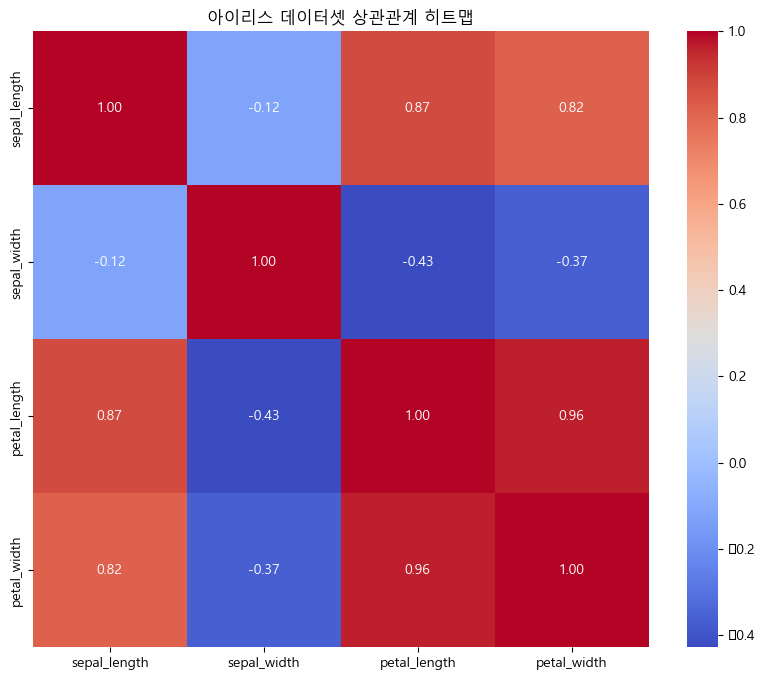

In [12]:
# 숫자형 변수만 선택하여 상관관계 행렬 계산
correlation_matrix = df_iris.select_dtypes(include=['float64', 'int64']).corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('아이리스 데이터셋 상관관계 히트맵')
plt.show()